# Node importance of characters in "A Journey to the West"

In [2]:
import networkx as nx
import numpy as np
import random
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

## Load dataset

Character relationship knowledge graph and OWL ontology.  
http://openkg.cn/dataset/ch4masterpieces

In [3]:
df = pd.read_csv('triples.csv')

In [4]:
df

,head,tail,relation,label
0,金蝉子,唐僧,past_life,前世
1,孙悟空,唐僧,apprentice,徒弟
2,猪八戒,唐僧,apprentice,徒弟
3,沙僧,唐僧,apprentice,徒弟
4,白龙马,唐僧,apprentice,徒弟
...,...,...,...,...
104,毗蓝婆菩萨,昴日星官,mother,母亲
105,嫦娥,后羿,wife,妻
106,敖摩昂,敖闰,son,儿
107,哪吒,李靖,son,儿


In [6]:
edges = [edge for edge in zip(df['head'], df['tail'])]

G = nx.DiGraph()
G.add_edges_from(edges)

In [7]:
print(G)

DiGraph with 104 nodes and 109 edges


In [8]:
G.nodes

NodeView(('金蝉子', '唐僧', '孙悟空', '猪八戒', '沙僧', '白龙马', '陈光蕊', '殷温娇', '法明和尚', '李世民', '殷开山', '菩提老祖', '镇元子', '牛魔王', '蛟魔王', '鹏魔王', '狮驼王', '猕猴王', '禺狨王', '天蓬元帅', '卵二姐', '高翠兰', '卷帘大将', '西海龙王', '西海龙母', '敖摩昂太子', '西海龙女', '李渊', '李建成', '李元吉', '王珪', '秦琼', '萧瑀', '傅奕', '魏征', '李玉英', '房玄龄', '杜如晦', '徐世绩', '徐茂公', '许敬宗', '马三宝', '段志贤', '程咬金', '虞世南', '张道源', '张士衡', '高太公', '高香兰', '高玉兰', '寇洪', '寇梁', '宼栋', '袁守诚', '袁天罡', '李靖', '木吒', '哪吒', '金吒', '正元龙', '观音菩萨', '二十四路诸天', '守山大神', '善财童子', '捧珠龙女', '如来', '红孩儿', '黑风怪', '黄风怪', '灵吉菩萨', '黄毛貂鼠', '金角', '太上老君', '银角', '铁扇公主', '九尾狐狸', '狐阿七', '鼍龙怪', '西海龙王太子', '灵感大王', '独角兕大王', '玉面公主', '金毛犼', '黄眉道童', '弥勒佛', '百眼魔君', '毗蓝婆菩萨', '青狮', '文殊菩萨', '白象', '普贤菩萨', '大鹏金翅雕', '九头狮子', '太乙救苦天尊', '玉兔精', '嫦娥', '白鹿精', '南极寿星', '黄眉大王', '东来佛祖笑和尚', '昴日星官', '后羿', '敖摩昂', '敖闰'))

In [9]:
len(G)

104

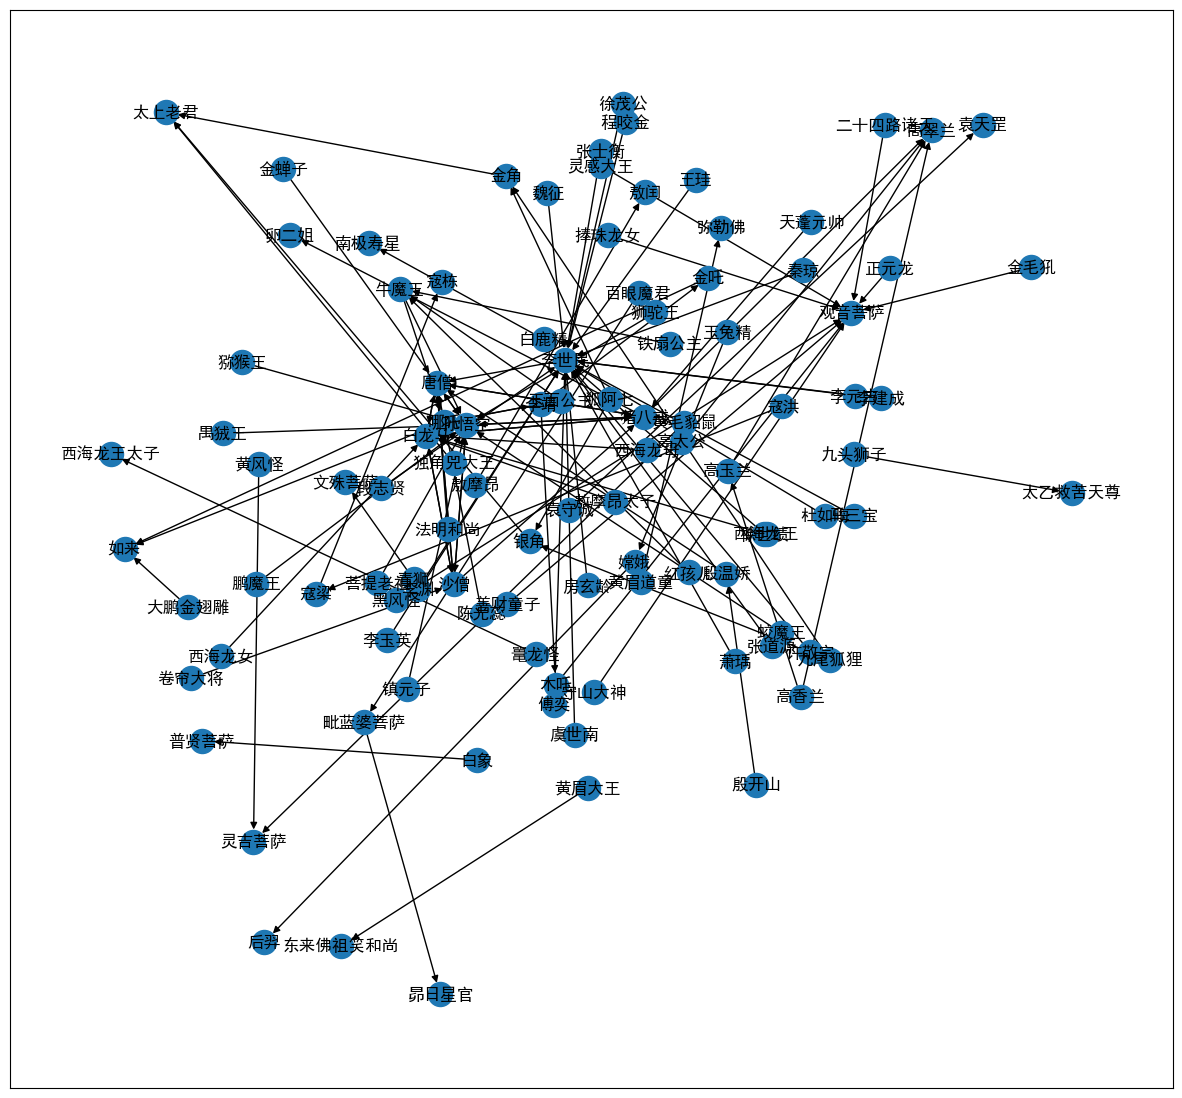

In [11]:
plt.figure(figsize=(15, 14))
pos = nx.spring_layout(G, iterations=3, seed=5)
nx.draw_networkx(G, pos, with_labels=True)
plt.show()

## Compute the PageRank importance for each node

In [13]:
pagerank = nx.pagerank(G,
                       alpha=0.85,
                       personalization=None,
                       max_iter=100,
                       tol=1e-06,
                       nstart=None,
                       dangling=None,
                       )

In [14]:
pagerank

{'金蝉子': 0.0028889203144616088,
 '唐僧': 0.13349105557884888,
 '孙悟空': 0.10498354112014094,
 '猪八戒': 0.09247797536009736,
 '沙僧': 0.07627154154696374,
 '白龙马': 0.09531260474698808,
 '陈光蕊': 0.0028889203144616088,
 '殷温娇': 0.005344620286308959,
 '法明和尚': 0.0028889203144616088,
 '李世民': 0.052002919751408624,
 '殷开山': 0.0028889203144616088,
 '菩提老祖': 0.0028889203144616088,
 '镇元子': 0.0028889203144616088,
 '牛魔王': 0.010256020230003658,
 '蛟魔王': 0.0028889203144616088,
 '鹏魔王': 0.0028889203144616088,
 '狮驼王': 0.0028889203144616088,
 '猕猴王': 0.0028889203144616088,
 '禺狨王': 0.0028889203144616088,
 '天蓬元帅': 0.0028889203144616088,
 '卵二姐': 0.01860884001045803,
 '高翠兰': 0.02579183411604112,
 '卷帘大将': 0.0028889203144616088,
 '西海龙王': 0.0028889203144616088,
 '西海龙母': 0.0028889203144616088,
 '敖摩昂太子': 0.0028889203144616088,
 '西海龙女': 0.0028889203144616088,
 '李渊': 0.0028889203144616088,
 '李建成': 0.0028889203144616088,
 '李元吉': 0.0028889203144616088,
 '王珪': 0.0028889203144616088,
 '秦琼': 0.0028889203144616088,
 '萧瑀': 0.002888920314

### Sort by PageRank Value

In [15]:
sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

[('唐僧', 0.13349105557884888),
 ('孙悟空', 0.10498354112014094),
 ('白龙马', 0.09531260474698808),
 ('猪八戒', 0.09247797536009736),
 ('沙僧', 0.07627154154696374),
 ('李世民', 0.052002919751408624),
 ('观音菩萨', 0.026625716774094633),
 ('高翠兰', 0.02579183411604112),
 ('卵二姐', 0.01860884001045803),
 ('太上老君', 0.014430996933862522),
 ('如来', 0.013334300311185142),
 ('牛魔王', 0.010256020230003658),
 ('哪吒', 0.009171370913926254),
 ('灵吉菩萨', 0.007800320258156309),
 ('宼栋', 0.007432108638238391),
 ('昴日星官', 0.007432108638238391),
 ('后羿', 0.007432108638238391),
 ('李靖', 0.006787403654483575),
 ('殷温娇', 0.005344620286308959),
 ('寇梁', 0.005344620286308959),
 ('袁天罡', 0.005344620286308959),
 ('金角', 0.005344620286308959),
 ('银角', 0.005344620286308959),
 ('西海龙王太子', 0.005344620286308959),
 ('弥勒佛', 0.005344620286308959),
 ('毗蓝婆菩萨', 0.005344620286308959),
 ('文殊菩萨', 0.005344620286308959),
 ('普贤菩萨', 0.005344620286308959),
 ('太乙救苦天尊', 0.005344620286308959),
 ('嫦娥', 0.005344620286308959),
 ('南极寿星', 0.005344620286308959),
 ('东来佛祖笑和尚'

### Visualization of PageRank values by sizes of nodes

In [16]:
node_sizes = (np.array(list(pagerank.values())) * 8000).astype(int)
node_sizes

array([  23, 1067,  839,  739,  610,  762,   23,   42,   23,  416,   23,
         23,   23,   82,   23,   23,   23,   23,   23,   23,  148,  206,
         23,   23,   23,   23,   23,   23,   23,   23,   23,   23,   23,
         23,   23,   23,   23,   23,   23,   23,   23,   23,   23,   23,
         23,   23,   23,   23,   23,   32,   23,   42,   59,   23,   42,
         54,   38,   73,   38,   23,  213,   23,   23,   23,   23,  106,
         23,   23,   23,   62,   23,   42,  115,   42,   23,   23,   23,
         23,   42,   23,   23,   23,   23,   23,   42,   23,   42,   23,
         42,   23,   42,   23,   23,   42,   23,   42,   23,   42,   23,
         42,   59,   59,   23,   42])

In [17]:
# Colors
M = G.number_of_edges()
edge_colors = range(2, M+2)

C:\Users\13014\AppData\Local\Temp\ipykernel_20220\79918007.py:3: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  edges = nx.draw_networkx_edges(


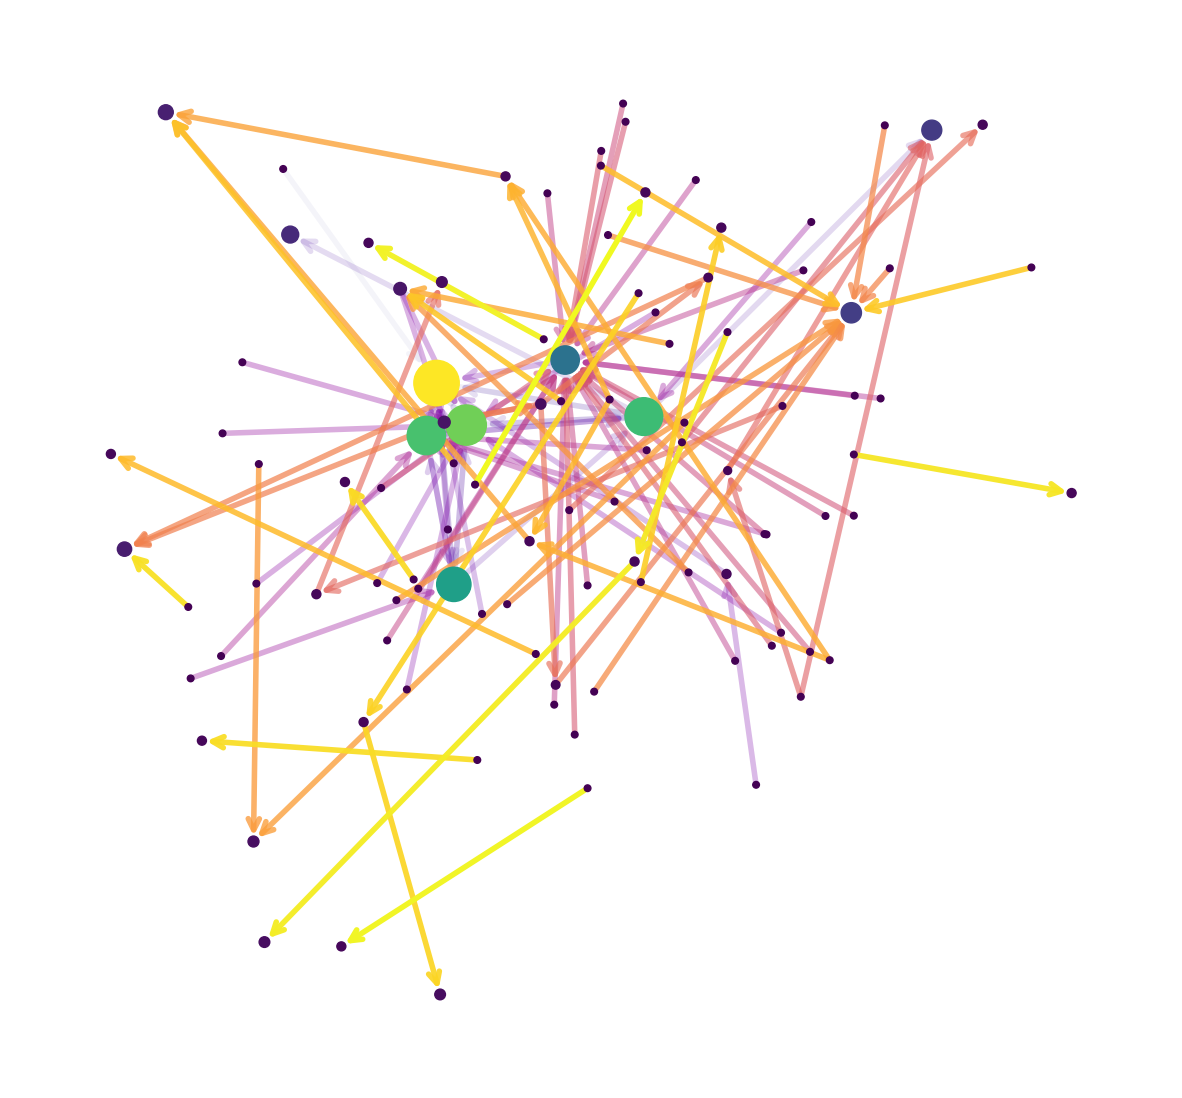

In [18]:
plt.figure(figsize=(15, 14))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes)
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=20,
    edge_color=edge_colors,
    edge_cmap=plt.cm.plasma,
    width=4
)

edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])
    
ax = plt.gca()
ax.set_axis_off()
plt.show()